# Práctica 5

## Integrantes:


- García Saavedra Armando
- Mejía Yañez José Ehecatl
- Rodriguez Nuñez Diego Eduardo

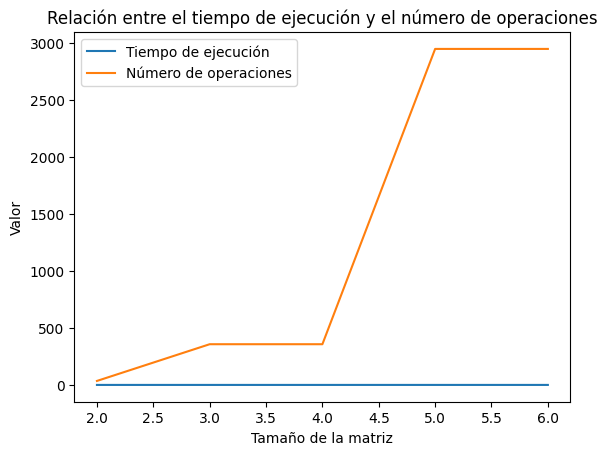

In [12]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
from sympy import *

def strassen_multiply(a, b, operaciones=0):
    n = len(a)

    if n == 1:
        return a * b, operaciones + 1

    next_pow = int(2 ** np.ceil(np.log2(n)))
    a_padded = np.pad(a, ((0, next_pow - n), (0, next_pow - n)), mode='constant')
    b_padded = np.pad(b, ((0, next_pow - n), (0, next_pow - n)), mode='constant')

    half_size = next_pow // 2
    a11, a12 = a_padded[:half_size, :half_size], a_padded[:half_size, half_size:]
    a21, a22 = a_padded[half_size:, :half_size], a_padded[half_size:, half_size:]
    b11, b12 = b_padded[:half_size, :half_size], b_padded[:half_size, half_size:]
    b21, b22 = b_padded[half_size:, :half_size], b_padded[half_size:, half_size:]

    p1, operaciones = strassen_multiply(a11 + a22, b11 + b22, operaciones)
    p2, operaciones = strassen_multiply(a21 + a22, b11, operaciones)
    p3, operaciones = strassen_multiply(a11, b12 - b22, operaciones)
    p4, operaciones = strassen_multiply(a22, b21 - b11, operaciones)
    p5, operaciones = strassen_multiply(a11 + a12, b22, operaciones)
    p6, operaciones = strassen_multiply(a21 - a11, b11 + b12, operaciones)
    p7, operaciones = strassen_multiply(a12 - a22, b21 + b22, operaciones)

    c11 = p1 + p4 - p5 + p7
    c12 = p3 + p5
    c21 = p2 + p4
    c22 = p1 - p2 + p3 + p6

    c = np.vstack((np.hstack((c11, c12)), np.hstack((c21, c22))))
    return c[:n, :n], operaciones + 7 * (next_pow**2)

def generar_matriz(n):
    return np.random.randint(1, 10, (n, n))

tamaños = [2, 3, 4, 5, 6]
tiempos = []
operaciones = []

for tamaño in tamaños:
    a = generar_matriz(tamaño)
    b = generar_matriz(tamaño)

    start_time = timeit.default_timer()
    resultado_strassen, total_operaciones = strassen_multiply(a, b)
    end_time = timeit.default_timer()
    tiempo_ejecucion = end_time - start_time

    tiempos.append(tiempo_ejecucion)
    operaciones.append(total_operaciones)

# Graficar los resultados
plt.plot(tamaños, tiempos, label='Tiempo de ejecución')
plt.plot(tamaños, operaciones, label='Número de operaciones')
plt.xlabel('Tamaño de la matriz')
plt.ylabel('Valor')
plt.title('Relación entre el tiempo de ejecución y el número de operaciones')
plt.legend()
plt.show()

***
# Tabulacion

In [13]:
data = {
    'Tamaño de la matriz':  [f'{n}x{n}' for n in tamaños],
    'Tiempo de ejecución': tiempos,
    'Número de operaciones': operaciones
}

df = pd.DataFrame(data)
df

,Tamaño de la matriz,Tiempo de ejecución,Número de operaciones
0,2x2,0.001103,35
1,3x3,0.002359,357
2,4x4,0.001743,357
3,5x5,0.012444,2947
4,6x6,0.009131,2947


In [14]:
init_printing()

n = symbols('n', integer=True)
T = Eq(Function('T')(n), 7*Function('T')(n/2) + O(n**2))

display(T)